# Exploring the data a bit with stacked bar charts

We've only been looking at the largest cities by population, but we have a whole bunch of other data we can use.

In [2]:
import pandas

df = pandas.read_csv('US_cities.csv', index_col="AccentCity")
df[:5]

,id,Country,City,Region,Population,Latitude,Longitude
AccentCity,,,,,,,
Alabaster,2907755,us,alabaster,AL,26738.0,33.244167,-86.816389
Albertville,2907759,us,albertville,AL,18368.0,34.267500,-86.208889
Alexander City,2907765,us,alexander city,AL,14993.0,32.943889,-85.953889
Anniston,2907804,us,anniston,AL,23423.0,33.659722,-85.831667
Athens,2907848,us,athens,AL,20470.0,34.802778,-86.971667


We have over 4000 cities and towns in the database, definitely too many for a bar chart. But we could look at the population data at the state level. First, let's try just a simple groupby in pandas. 

In [43]:
states_pop = df[["Population", "Region"]].groupby(by=["Region"]).sum()
states_pop[:5]

,Population
Region,
AK,425708.0
AL,1995225.0
AR,1212898.0
AZ,4838335.0
CA,30890865.0


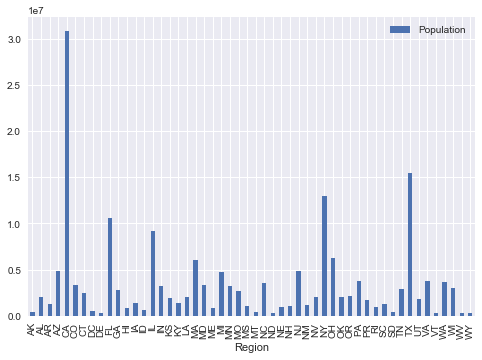

In [42]:
states_pop.plot.bar()
plt.show()

Let's make a stacked bar chart that shows us how much the three largest cities contribute to population compared to the rest of the state. First, we'll need to get a separate list of the three top cities. To do that, we'll be using the pandas groupby method.

In [59]:
largest_cities_idx = df.groupby(by=["Region"], sort=False)["Population"].transform(max) == df["Population"]
df[largest_cities_idx][:5]

,id,Country,City,Region,Population,Latitude,Longitude
AccentCity,,,,,,,
Birmingham,2908046,us,birmingham,AL,231621.0,33.520556,-86.802500
Anchorage,2912001,us,anchorage,AK,276263.0,61.218056,-149.900278
Phoenix,2913986,us,phoenix,AZ,1428509.0,33.448333,-112.073333
Little Rock,2916351,us,little rock,AR,184217.0,34.746389,-92.289444
Los Angeles,2920652,us,los angeles,CA,3877129.0,34.052222,-118.242778


In [87]:
def max2(cities):
    return nth_largest(cities, 2)
def max3(cities):
    return nth_largest(cities, 3)
def nth_largest(cities, n):
    nlargest = cities.nlargest(n)
    if len(nlargest) < n:
        return None
    return nlargest[n-1]
second_largest_idx = df.groupby(by=["Region"], sort=False)["Population"].transform(max2) == df["Population"]
third_largest_idx = df.groupby(by=["Region"], sort=False)["Population"].transform(max3) == df["Population"]
df[second_largest_idx][:5]

,id,Country,City,Region,Population,Latitude,Longitude
AccentCity,,,,,,,
Montgomery,2910236,us,montgomery,AL,198325.0,32.366667,-86.300000
Juneau,2912251,us,juneau,AK,31796.0,58.301944,-134.419722
Tucson,2914501,us,tucson,AZ,518907.0,32.221667,-110.925833
Fort Smith,2915717,us,fort smith,AR,81985.0,35.385833,-94.398333
San Diego,2922103,us,san diego,CA,1287050.0,32.715278,-117.156389


Now we just need to sum the rest of the cities that we haven't counted yet.

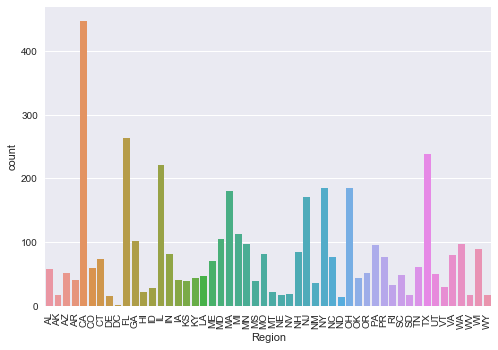

In [35]:
seaborn.countplot(x="Region", data=df)
plt.xticks(rotation="vertical")
plt.show()

# Interactive

### Bokeh

...

### Altair

...